In [46]:
import mplfinance as mpf
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [22]:
df = pd.read_csv('StockPriceHistory.csv', encoding='CP932')

In [23]:
df = df.drop(["Unnamed: 7", "前日比"], axis=1)

In [25]:
df = df.rename(columns={'基準日':'Date', '始値':'Open', '高値':'High', '安値':'Low', '終値':'Close', '出来高':'Volume'})

In [27]:
df = df.sort_values(by='Date')

In [38]:
def fix_date(row):
    return row.split('(')[0]
df['Date'] = df['Date'].apply(fix_date)

In [42]:
df.index = pd.to_datetime(df.Date)

In [43]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

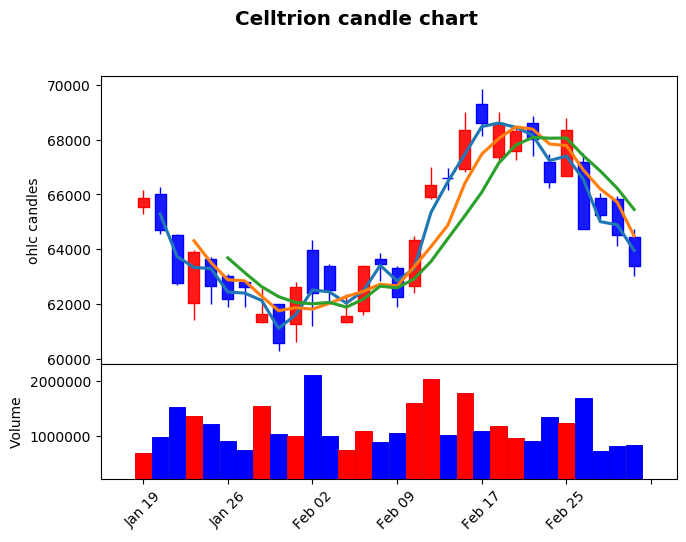

In [54]:
kwargs = dict(title='Celltrion candle chart', type='candle',
        mav=(2,4,6), volume=True, ylabel='ohlc candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)
mpt.plot(df, **kwargs, style=s)